In [ ]:
from google.colab import files
uploaded = files.upload()


Saving hacktrain.csv to hacktrain (1).csv
Saving hacktest.csv to hacktest.csv


In [ ]:
# ✅ 1. Imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import xgboost as xgb
import joblib

# ✅ 2. Load training data
df = pd.read_csv('hacktrain.csv')

# ✅ 3. Drop unnecessary columns
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

# ✅ 4. Encode target labels
label_encoder = LabelEncoder()
df['class_encoded'] = label_encoder.fit_transform(df['class'])

# ✅ 5. Save label encoder for submission
joblib.dump(label_encoder, 'label_encoder.pkl')

# ✅ 6. Separate features and target
X = df.drop(columns=['class', 'class_encoded'])
y = df['class_encoded']

# ✅ 7. Check for missing values
print("Missing values per column:")
print(X.isnull().sum())

# Optional: Drop rows with NaNs
X = X.dropna()
y = y.loc[X.index]

# ✅ 8. Final confirmation
print("✅ Shape of X:", X.shape)
print("✅ Unique classes:", np.unique(y))
print("✅ Label mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


Missing values per column:
ID               0
20150720_N     560
20150602_N    1200
20150517_N     800
20150501_N     960
20150415_N     480
20150330_N    1120
20150314_N     720
20150226_N    1360
20150210_N     640
20150125_N    1040
20150109_N     880
20141117_N    1280
20141101_N     400
20141016_N    1440
20140930_N     800
20140813_N     560
20140626_N    1600
20140610_N     480
20140525_N     720
20140509_N     880
20140423_N    1760
20140407_N     640
20140322_N    1120
20140218_N    1440
20140202_N     560
20140117_N    1200
20140101_N     400
dtype: int64
✅ Shape of X: (299, 28)
✅ Unique classes: [0 1 2 3 5]
✅ Label mapping: {'farm': np.int64(0), 'forest': np.int64(1), 'grass': np.int64(2), 'impervious': np.int64(3), 'orchard': np.int64(4), 'water': np.int64(5)}


Train shape: (8000, 30)
Test shape: (2845, 29)
Train columns: ['Unnamed: 0', 'ID', 'class', '20150720_N', '20150602_N', '20150517_N', '20150501_N', '20150415_N', '20150330_N', '20150314_N', '20150226_N', '20150210_N', '20150125_N', '20150109_N', '20141117_N', '20141101_N', '20141016_N', '20140930_N', '20140813_N', '20140626_N', '20140610_N', '20140525_N', '20140509_N', '20140423_N', '20140407_N', '20140322_N', '20140218_N', '20140202_N', '20140117_N', '20140101_N']

🔍 Nulls in Train:
 20140423_N    1760
20140626_N    1600
20141016_N    1440
20140218_N    1440
20150226_N    1360
20141117_N    1280
20140117_N    1200
20150602_N    1200
20150330_N    1120
20140322_N    1120
20150125_N    1040
20150501_N     960
20140509_N     880
20150109_N     880
20140930_N     800
20150517_N     800
20150314_N     720
20140525_N     720
20140407_N     640
20150210_N     640
20150720_N     560
20140813_N     560
20140202_N     560
20140610_N     480
20150415_N     480
20141101_N     400
20140101_N     4

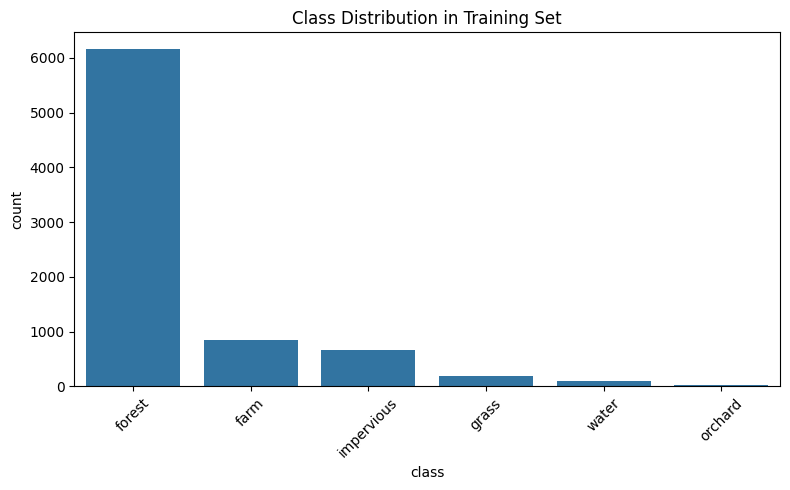


🟩 NDVI Feature Columns (27):
 ['20150720_N', '20150602_N', '20150517_N', '20150501_N', '20150415_N', '20150330_N', '20150314_N', '20150226_N', '20150210_N', '20150125_N', '20150109_N', '20141117_N', '20141101_N', '20141016_N', '20140930_N', '20140813_N', '20140626_N', '20140610_N', '20140525_N', '20140509_N', '20140423_N', '20140407_N', '20140322_N', '20140218_N', '20140202_N', '20140117_N', '20140101_N']

🔎 Dtypes:
 Unnamed: 0      int64
ID              int64
class          object
20150720_N    float64
20150602_N    float64
20150517_N    float64
20150501_N    float64
20150415_N    float64
20150330_N    float64
20150314_N    float64
20150226_N    float64
20150210_N    float64
20150125_N    float64
20150109_N    float64
20141117_N    float64
20141101_N    float64
20141016_N    float64
20140930_N    float64
20140813_N    float64
20140626_N    float64
20140610_N    float64
20140525_N    float64
20140509_N    float64
20140423_N    float64
20140407_N    float64
20140322_N    float64
201402

In [ ]:
# ✅ 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# ✅ 2. Load train and test datasets
train_df = pd.read_csv('hacktrain.csv')
test_df = pd.read_csv('hacktest.csv')

# ✅ 3. Preview
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
print("Train columns:", train_df.columns.tolist())

# ✅ 4. Check for nulls
print("\n🔍 Nulls in Train:\n", train_df.isnull().sum().sort_values(ascending=False))
print("\n🔍 Nulls in Test:\n", test_df.isnull().sum().sort_values(ascending=False))

# ✅ 5. Class Distribution Plot
plt.figure(figsize=(8, 5))
sns.countplot(data=train_df, x='class', order=train_df['class'].value_counts().index)
plt.title("Class Distribution in Training Set")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ✅ 6. List of NDVI time-series columns
ndvi_cols = [col for col in train_df.columns if col.endswith('_N')]
print(f"\n🟩 NDVI Feature Columns ({len(ndvi_cols)}):\n", ndvi_cols)

# ✅ 7. Check dtypes
print("\n🔎 Dtypes:\n", train_df.dtypes)

# ✅ 8. Optional: Drop irrelevant columns if present
cols_to_drop = ['Unnamed: 0'] if 'Unnamed: 0' in train_df.columns else []
train_df.drop(columns=cols_to_drop, inplace=True)
test_df.drop(columns=cols_to_drop, inplace=True)

# ✅ 9. Label encoding for target
label_encoder = LabelEncoder()
train_df['class_encoded'] = label_encoder.fit_transform(train_df['class'])

# ✅ 10. Save encoder for submission
import joblib
joblib.dump(label_encoder, 'label_encoder.pkl')

# ✅ 11. Final checks
print("✅ Unique classes:", label_encoder.classes_)
print("✅ Label mapping:", dict(zip(label_encoder.classes_, range(len(label_encoder.classes_)))))


Train shape: (8000, 30)
Test shape: (2845, 29)
Train columns: ['Unnamed: 0', 'ID', 'class', '20150720_N', '20150602_N', '20150517_N', '20150501_N', '20150415_N', '20150330_N', '20150314_N', '20150226_N', '20150210_N', '20150125_N', '20150109_N', '20141117_N', '20141101_N', '20141016_N', '20140930_N', '20140813_N', '20140626_N', '20140610_N', '20140525_N', '20140509_N', '20140423_N', '20140407_N', '20140322_N', '20140218_N', '20140202_N', '20140117_N', '20140101_N']

🔍 Nulls in Train:
 20140423_N    1760
20140626_N    1600
20141016_N    1440
20140218_N    1440
20150226_N    1360
20141117_N    1280
20140117_N    1200
20150602_N    1200
20150330_N    1120
20140322_N    1120
20150125_N    1040
20150501_N     960
20140509_N     880
20150109_N     880
20140930_N     800
20150517_N     800
20150314_N     720
20140525_N     720
20140407_N     640
20150210_N     640
20150720_N     560
20140813_N     560
20140202_N     560
20140610_N     480
20150415_N     480
20141101_N     400
20140101_N     4

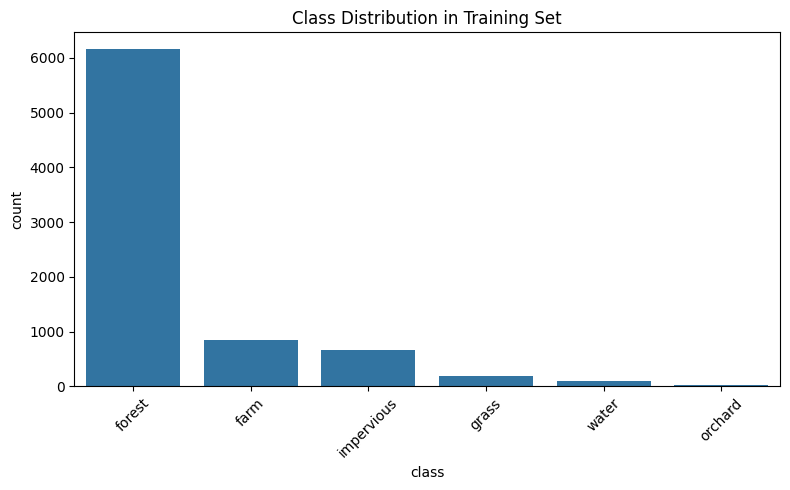


🟩 NDVI Feature Columns (27):
 ['20150720_N', '20150602_N', '20150517_N', '20150501_N', '20150415_N', '20150330_N', '20150314_N', '20150226_N', '20150210_N', '20150125_N', '20150109_N', '20141117_N', '20141101_N', '20141016_N', '20140930_N', '20140813_N', '20140626_N', '20140610_N', '20140525_N', '20140509_N', '20140423_N', '20140407_N', '20140322_N', '20140218_N', '20140202_N', '20140117_N', '20140101_N']

🔎 Dtypes:
 Unnamed: 0      int64
ID              int64
class          object
20150720_N    float64
20150602_N    float64
20150517_N    float64
20150501_N    float64
20150415_N    float64
20150330_N    float64
20150314_N    float64
20150226_N    float64
20150210_N    float64
20150125_N    float64
20150109_N    float64
20141117_N    float64
20141101_N    float64
20141016_N    float64
20140930_N    float64
20140813_N    float64
20140626_N    float64
20140610_N    float64
20140525_N    float64
20140509_N    float64
20140423_N    float64
20140407_N    float64
20140322_N    float64
201402

In [ ]:
# ✅ 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# ✅ 2. Load train and test datasets
train_df = pd.read_csv('hacktrain.csv')
test_df = pd.read_csv('hacktest.csv')

# ✅ 3. Preview
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
print("Train columns:", train_df.columns.tolist())

# ✅ 4. Check for nulls
print("\n🔍 Nulls in Train:\n", train_df.isnull().sum().sort_values(ascending=False))
print("\n🔍 Nulls in Test:\n", test_df.isnull().sum().sort_values(ascending=False))

# ✅ 5. Class Distribution Plot
plt.figure(figsize=(8, 5))
sns.countplot(data=train_df, x='class', order=train_df['class'].value_counts().index)
plt.title("Class Distribution in Training Set")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ✅ 6. List of NDVI time-series columns
ndvi_cols = [col for col in train_df.columns if col.endswith('_N')]
print(f"\n🟩 NDVI Feature Columns ({len(ndvi_cols)}):\n", ndvi_cols)

# ✅ 7. Check dtypes
print("\n🔎 Dtypes:\n", train_df.dtypes)

# ✅ 8. Optional: Drop irrelevant columns if present
cols_to_drop = ['Unnamed: 0'] if 'Unnamed: 0' in train_df.columns else []
train_df.drop(columns=cols_to_drop, inplace=True)
test_df.drop(columns=cols_to_drop, inplace=True)

# ✅ 9. Label encoding for target
label_encoder = LabelEncoder()
train_df['class_encoded'] = label_encoder.fit_transform(train_df['class'])

# ✅ 10. Save encoder for submission
import joblib
joblib.dump(label_encoder, 'label_encoder.pkl')

# ✅ 11. Final checks
print("✅ Unique classes:", label_encoder.classes_)
print("✅ Label mapping:", dict(zip(label_encoder.classes_, range(len(label_encoder.classes_)))))


In [ ]:
# ✅ 1. Smoothing function (rolling mean with window=3)
def smooth_ndvi(df, ndvi_cols, window=3):
    df_smooth = df.copy()
    for col in ndvi_cols:
        df_smooth[col] = df_smooth[col].rolling(window=window, min_periods=1, axis=1).mean()
    return df_smooth

# ✅ 2. NDVI columns list (reuse from Subtask 1 if needed)
ndvi_cols = [col for col in train_df.columns if col.endswith('_N')]

# ✅ 3. Drop rows with all NDVI missing
train_df['ndvi_nan_count'] = train_df[ndvi_cols].isna().sum(axis=1)
print("🔍 Rows with all NDVI NaNs (Train):", (train_df['ndvi_nan_count'] == len(ndvi_cols)).sum())
train_df = train_df[train_df['ndvi_nan_count'] != len(ndvi_cols)].drop(columns='ndvi_nan_count')

test_df['ndvi_nan_count'] = test_df[ndvi_cols].isna().sum(axis=1)
print("🔍 Rows with all NDVI NaNs (Test):", (test_df['ndvi_nan_count'] == len(ndvi_cols)).sum())
test_df = test_df[test_df['ndvi_nan_count'] != len(ndvi_cols)].drop(columns='ndvi_nan_count')

# ✅ 4. Cap extreme NDVI values to realistic range
def cap_ndvi(df, ndvi_cols, low=-0.2, high=0.9):
    df_capped = df.copy()
    df_capped[ndvi_cols] = df_capped[ndvi_cols].clip(lower=low, upper=high)
    return df_capped

train_df = cap_ndvi(train_df, ndvi_cols)
test_df = cap_ndvi(test_df, ndvi_cols)

# ✅ 5. (Optional) Apply smoothing — this depends on shape; some pandas versions don’t support row-wise rolling directly
# Let's smooth each row's NDVI separately
def rowwise_rolling_mean(df, ndvi_cols, window=3):
    arr = df[ndvi_cols].values
    smoothed = []
    for row in arr:
        row_series = pd.Series(row)
        smoothed_row = row_series.rolling(window=window, min_periods=1, center=True).mean().values
        smoothed.append(smoothed_row)
    return pd.DataFrame(smoothed, columns=ndvi_cols)

train_df[ndvi_cols] = rowwise_rolling_mean(train_df, ndvi_cols, window=3)
test_df[ndvi_cols] = rowwise_rolling_mean(test_df, ndvi_cols, window=3)

# ✅ 6. Final sanity check
print("✅ Cleaned Train shape:", train_df.shape)
print("✅ Cleaned Test shape:", test_df.shape)


🔍 Rows with all NDVI NaNs (Train): 0
🔍 Rows with all NDVI NaNs (Test): 0
✅ Cleaned Train shape: (8000, 30)
✅ Cleaned Test shape: (2845, 28)


In [ ]:
# 1. Interpolate across columns (axis=1) — linear interpolation
def interpolate_ndvi(df, ndvi_cols):
    df_interp = df.copy()
    df_interp[ndvi_cols] = df_interp[ndvi_cols].interpolate(method='linear', axis=1, limit_direction='both')
    return df_interp

train_df = interpolate_ndvi(train_df, ndvi_cols)
test_df = interpolate_ndvi(test_df, ndvi_cols)

# 2. Fill remaining NaNs (if any) using row-wise mean
def fill_remaining_with_row_mean(df, ndvi_cols):
    df_filled = df.copy()
    ndvi_values = df_filled[ndvi_cols]
    row_means = ndvi_values.mean(axis=1)
    df_filled[ndvi_cols] = ndvi_values.T.fillna(row_means).T  # Fill NaNs in each row with that row's mean
    return df_filled

train_df = fill_remaining_with_row_mean(train_df, ndvi_cols)
test_df = fill_remaining_with_row_mean(test_df, ndvi_cols)

# 3. Final check
print("✅ Remaining NaNs in train:", train_df[ndvi_cols].isna().sum().sum())
print("✅ Remaining NaNs in test:", test_df[ndvi_cols].isna().sum().sum())


✅ Remaining NaNs in train: 0
✅ Remaining NaNs in test: 0


In [ ]:
import numpy as np

# 1. IQR-based clipping per row
def clip_outliers_iqr(df, ndvi_cols):
    df_clipped = df.copy()
    for i, row in df_clipped[ndvi_cols].iterrows():
        q1 = row.quantile(0.25)
        q3 = row.quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        df_clipped.loc[i, ndvi_cols] = np.clip(row, lower, upper)
    return df_clipped

train_df = clip_outliers_iqr(train_df, ndvi_cols)
test_df = clip_outliers_iqr(test_df, ndvi_cols)

print("✅ Outliers clipped using IQR.")



✅ Outliers clipped using IQR.


In [ ]:
from scipy.stats import skew, kurtosis
from sklearn.linear_model import LinearRegression

def extract_features(df, ndvi_cols):
    features = pd.DataFrame()

    # Basic stats
    features['ndvi_mean'] = df[ndvi_cols].mean(axis=1)
    features['ndvi_std'] = df[ndvi_cols].std(axis=1)
    features['ndvi_min'] = df[ndvi_cols].min(axis=1)
    features['ndvi_max'] = df[ndvi_cols].max(axis=1)
    features['ndvi_median'] = df[ndvi_cols].median(axis=1)
    features['ndvi_range'] = features['ndvi_max'] - features['ndvi_min']
    features['ndvi_skew'] = df[ndvi_cols].apply(skew, axis=1)
    features['ndvi_kurtosis'] = df[ndvi_cols].apply(kurtosis, axis=1)

    # Temporal trend (slope)
    x = np.arange(len(ndvi_cols)).reshape(-1, 1)
    def get_slope(row):
        y = row.values.reshape(-1, 1)
        model = LinearRegression().fit(x, y)
        return model.coef_[0][0]
    features['ndvi_slope'] = df[ndvi_cols].apply(get_slope, axis=1)

    # Max diff between consecutive NDVI time points
    features['ndvi_max_diff'] = df[ndvi_cols].diff(axis=1).abs().max(axis=1)

    # Seasonal averages
    features['ndvi_early_mean'] = df[ndvi_cols[:9]].mean(axis=1)
    features['ndvi_mid_mean']   = df[ndvi_cols[9:18]].mean(axis=1)
    features['ndvi_late_mean']  = df[ndvi_cols[18:]].mean(axis=1)

    return features


In [ ]:
🔹 Subtask 6: Target Encoding
Goal: Convert string labels into numeric format.

Use LabelEncoder on the target variable (class).

Save the encoder to inverse-transform predictions later for submission.



In [ ]:
from sklearn.preprocessing import LabelEncoder
import joblib

# 1. Encode target
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(train_df['class'])

# 2. Show mapping
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("✅ Label Mapping:", label_mapping)

# 3. Save encoder for inverse-transform during submission
joblib.dump(label_encoder, 'label_encoder.pkl')


✅ Label Mapping: {'farm': np.int64(0), 'forest': np.int64(1), 'grass': np.int64(2), 'impervious': np.int64(3), 'orchard': np.int64(4), 'water': np.int64(5)}


['label_encoder.pkl']

In [ ]:
# 1. Generate test features using same logic as train
engineered_test_df = create_features(test_df[ndvi_cols])

# 2. Ensure column order matches train
X_test_final = engineered_test_df[features.columns]

# 3. Predict using your trained XGBoost model
y_pred = model.predict(X_test_final)

# 4. Inverse transform to get string labels (e.g., 'forest', 'water', etc.)
y_pred_labels = label_encoder.inverse_transform(y_pred.astype(int))

# 5. Create submission DataFrame
submission = pd.DataFrame({
    'ID': test_df['ID'],         # or use test_df.index + 1 if no ID column
    'class': y_pred_labels
})

# 6. Save to CSV
submission.to_csv('submission_xgboost.csv', index=False)

# 7. Download
from google.colab import files
files.download('submission_xgboost.csv')


NameError: name 'features' is not defined

In [ ]:
features = create_features(df[ndvi_cols])


ValueError: Input y contains NaN.

In [ ]:
# 1. Identify NDVI columns
ndvi_cols = [col for col in df.columns if 'NDVI' in col or col.endswith('_N')]

# 2. Interpolate NDVI time series across columns (axis=1)
df[ndvi_cols] = df[ndvi_cols].interpolate(axis=1, limit_direction='both')

# 3. Fill any remaining NaNs with row-wise mean (local imputation)
df[ndvi_cols] = df[ndvi_cols].apply(lambda row: row.fillna(row.mean()), axis=1)

# 4. Now you can safely extract features
features = create_features(df[ndvi_cols])


In [ ]:
features = create_features(df[ndvi_cols])


In [ ]:
# Step 1: Identify NDVI columns from test_df
ndvi_cols = [col for col in test_df.columns if 'NDVI' in col or col.endswith('_N')]

# Step 2: Apply the same feature extraction to test data
engineered_test_df = create_features(test_df[ndvi_cols])


In [ ]:
X_test_final = engineered_test_df[features.columns]
y_pred = model.predict(X_test_final)
# etc.


NameError: name 'model' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Extract features and target
X_final = features
y_final = df['class_encoded']  # already label encoded earlier

# Optional: split for validation (not needed if training on full data)
X_train, X_val, y_train, y_val = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

# Step 2: Train XGBoost on full training set
model = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42, n_jobs=-1)
model.fit(X_final, y_final)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# Make sure test features were created like this:
# engineered_test_df = create_features(test_df[ndvi_cols])

X_test_final = engineered_test_df[X_final.columns]  # ensure same column order

# Predict class labels (encoded)
y_pred_encoded = model.predict(X_test_final)

# Inverse transform to original string labels
y_pred_labels = label_encoder.inverse_transform(y_pred_encoded)


In [ ]:
submission = pd.DataFrame({
    'ID': test_df['ID'],      # or test_df.index + 1 if no ID column
    'class': y_pred_labels
})

submission.to_csv("submission_xgboost.csv", index=False)

# For Colab
from google.colab import files
files.download("submission_xgboost.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>